# Biblioteki

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

#Wczytanie danych

In [ ]:
df = sns.load_dataset("titanic")
# print(df.head(10))
# print(df.shape)
print(df.isnull().sum())
df = df.dropna(subset=['age'])
df = df.dropna(subset=['embarked'])
print("---Po usunieciu---")
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
---Po usunieciu---
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           530
embark_town      0
alive            0
alone            0
dtype: int64


In [ ]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False


#Dodanie kolumny

In [ ]:
min_fare = df['fare'].min()
max_fare = df['fare'].max()
print(f"Min vilrt: {min_fare}, max bilet: {max_fare}")
fare_step = (max_fare-min_fare) / 3
fare_ranges = [min_fare + fare_step,min_fare + 2 * fare_step]

def categotize_fare(fare,fare_ranges):
  if fare <= fare_ranges[0]:
    return 1 #Najtaansza grupa
  elif fare <= fare_ranges[1]:
    return 2 #Sredni koszt
  else:
    return 3 #Najdrozszy koszt

print(f"Najtansza grupa {min_fare:.2f} - {fare_ranges[0]:.2f}")
print(f"Średnia grupa {fare_ranges[0]:.2f} - {fare_ranges[1]:.2f}")
print(f"Najdrozsza grupa {fare_ranges[1]:.2f} - {max_fare:.2f}")

df["fare_category"] = df["fare"].apply(lambda x: categotize_fare(x,fare_ranges))

Min vilrt: 0.0, max bilet: 512.3292
Najtansza grupa 0.00 - 170.78
Średnia grupa 170.78 - 341.55
Najdrozsza grupa 341.55 - 512.33


In [ ]:

df['fare_category'].value_counts()
#df.head(10)

,count
fare_category,
1,694
2,15
3,3


In [ ]:
selected_features = ['sex','age','pclass','embarked']
df_model = df.copy()
df_model['sex'] = df_model['sex'].map({'male':0, 'female':1})
df_model['embarked'] = df_model['embarked'].map({'S':0, 'C':1, 'Q':2})
X = df_model[selected_features]
y = df_model['survived']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=67)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#Trenowanie modelu

In [ ]:
model = LogisticRegression(random_state=67)
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test,y_pred)
print(f"Dokladnosc moedlu {(accuracy*100):.2f}%")

Dokladnosc moedlu 79.02%


Metryki jakosci

In [ ]:
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1 = 2 * (recall * precision) / (precision + recall)
print(f"Recall/Czułość: {recall*100:.2f}%")
print(f"Precision/Precyzja: {precision*100:.2f}%")
print(f"Miara F1: {f1*100:.2f}%")

              precision    recall  f1-score   support

           0       0.74      0.91      0.82        74
           1       0.87      0.67      0.75        69

    accuracy                           0.79       143
   macro avg       0.81      0.79      0.79       143
weighted avg       0.80      0.79      0.79       143

Recall/Czułość: 66.67%
Precision/Precyzja: 86.79%
Miara F1: 75.41%


Wizualizacja

Text(50.72222222222221, 0.5, 'Rzeczywiste')

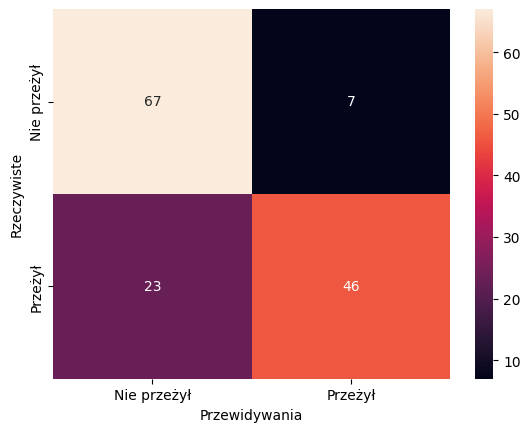

In [ ]:
plt.figure()
sns.heatmap(conf_matrix,annot=True,xticklabels={"Nie przeżył", "Przeżył"}, yticklabels={"Nie przeżył", "Przeżył"})
plt.xlabel("Przewidywania")
plt.ylabel("Rzeczywiste")

Symulator Przetrwania

In [ ]:
print("Prognoza przeżycia dla nowego pasażera")
sex_input = input("Podaj płeć (m/k) ").lower()
sex = 0 if sex_input == "m" else 1

age_input = input("Podaj wiek ")
age = int(age_input)

pclass_input = input("Podaj klase podróży 1/2/3 ")
pclass = int(pclass_input)

embarked_input = input("Podaj Miasto Wsiadania S, C, Q ").lower()
embarked = 0
if embarked_input == "s":
  embarked = 0
elif embarked_input == "c":
  embarked = 1
else:
  embarked = 2

nowy_pasazer = pd.DataFrame({
    "sex" : [sex],
    "age" : [age],
    "pclass" : [pclass],
    "embarked" : [embarked]
})

nowy_pasazer_scale = scaler.transform(nowy_pasazer)
czyPrzezyje = model.predict(nowy_pasazer_scale)
print(f"Czy przezyje? {czyPrzezyje}")
szanse = model.predict_proba(nowy_pasazer_scale)
print(f"Szanse na przezycie: {szanse[0][1]*100:.2f}%")

Prognoza przeżycia dla nowego pasażera
Podaj płeć (m/k) m
Podaj wiek 12
Podaj klase podróży 1/2/3 1
Podaj Miasto Wsiadania S, C, Q s
Czy przezyje? [1]
Szanse na przezycie: 55.05%
